<img src='bit_hd.jpg' />

# <span style="color:blue"> DEFINATION </span>: Random Forest  algorithm for classification of customer who will purchased or not product.
## <span style="color:blue">Prepared By</span>:     PRATIK VASAVA

# Support Vector Machine(SVM):
    
SVM is a supervised machine learning algorithm which can be used for classification or regression problems. It uses a 

technique called the kernel trick to transform your data and then based on these transformations it finds an optimal 

boundary between the possible outputs.it does some extremely complex data transformations, then figures out 

how to seperate your data based on the labels or outputs you've defined.

# Prerequisites Python libraries

#### Pandas(https://pandas.pydata.org/getpandas.html) =Library for data data manipulation and analysis.
#### Matplolib(https://matplotlib.org/)=Library for to performe mathamtical oprations.
##### numpy(http://www.numpy.org/)=Library  NumPy is a general-purpose array-processing package. 

## Importing Libraries.

In [12]:
#Loadindg all necessary python libraries.python version(v3.7).
#data manipulation and analysis
import pandas as pd
#scientific computing 
import numpy as np
#visulatition 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#import roc_curve
from sklearn.metrics import confusion_matrix
#from sklearn metrics
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [13]:
#crate varible for file
file='Social_Network_Ads.csv'

In [14]:
#Reading file using pandas.
data=pd.read_csv(file)

In [15]:
#checking structure of data (row,colums)
data.shape

(400, 5)

In [16]:
#let's see first five entry of dataset
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
data['Purchased'].unique()

array([0, 1], dtype=int64)

In [18]:
#Infromation of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [19]:
#let's check basic stastics of data
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [20]:
data=data.drop(columns=['User ID'],axis=1)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [21]:
data['Gender']=pd.get_dummies(data['Gender'])
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [23]:
#sns.pairplot(data, hue='Purchased')

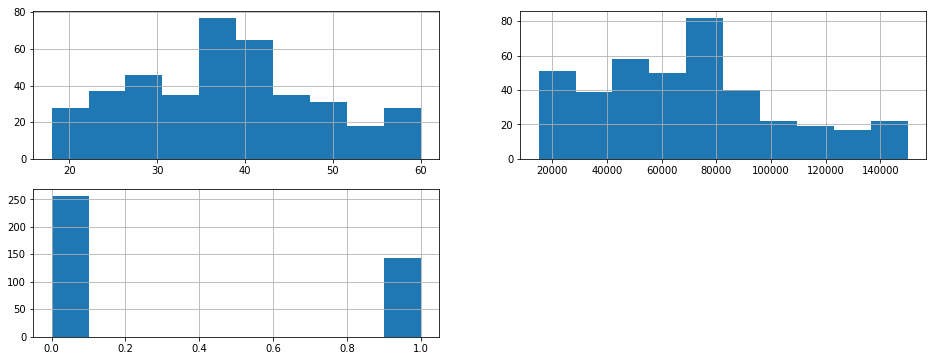

In [24]:
#Checking Distribution Of DataSet.
#plotting Histogram for each variables.
plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
#sns.countplot(data['Age'])
data['Age'].hist()
plt.subplot(2,2,2)
data['EstimatedSalary'].hist()
plt.subplot(2,2,3)
data['Purchased'].hist()

<function matplotlib.pyplot.show(*args, **kw)>

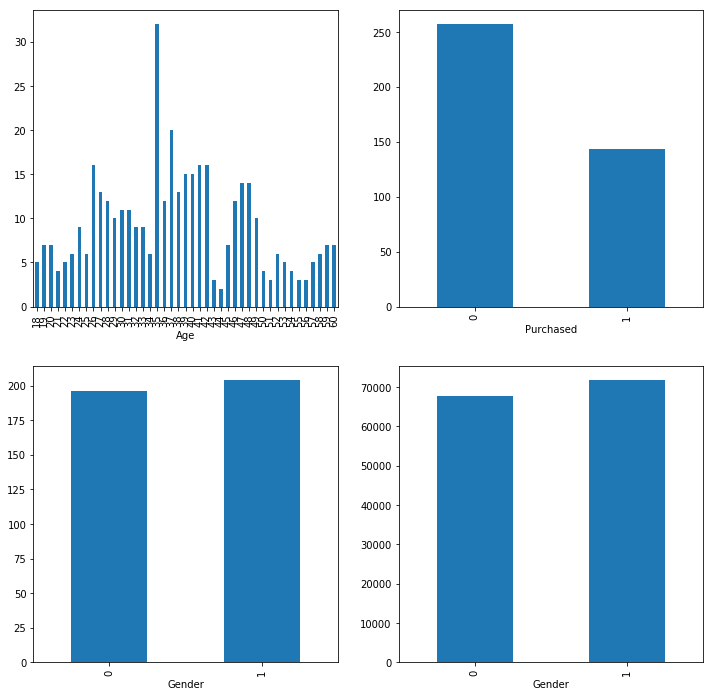

In [69]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
data.groupby('Age')['Purchased'].count().plot.bar()
plt.subplot(2,2,2)
data.groupby('Purchased')['EstimatedSalary'].count().plot.bar()
plt.subplot(2,2,3)
data.groupby('Gender')['Age'].count().plot.bar()
plt.subplot(2,2,4)
data.groupby('Gender')['EstimatedSalary'].mean().plot.bar()
plt.show

In [42]:
#Indipandant and depandant variable set up  
x=data.iloc[:,[1,2]].values
y=data.iloc[:,3].values

In [43]:
#importing model selection library.
from sklearn.model_selection import train_test_split

In [44]:
#Splitting data as 'Train' and 'Test' data.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [45]:
#scalling of data with standard scaler wich convert all vales betweem 0 t0 1.
from sklearn.preprocessing import StandardScaler

In [46]:
#scaler classifier
sc=StandardScaler()

In [47]:
#fit and tranfroming to scal down data.
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## support vector machine 

In [48]:
#import svm libarary.
from sklearn.svm import SVC

In [49]:
#set calssifier
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [50]:
#lets predict  'TEST' values according to classifier
y_pred=classifier.predict(x_test)

In [51]:
#comparing actual and predicted values.
asd=pd.DataFrame({'Actual':y_test,'predicted':y_pred})

In [52]:
#lets check how comparition seen
asd.head()

,Actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015EA0D68>,
      dtype=object)

<Figure size 504x504 with 0 Axes>

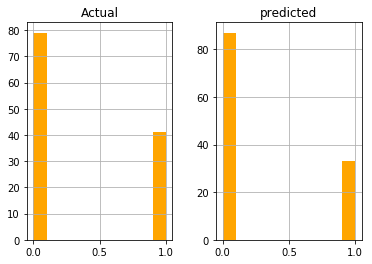

In [53]:
plt.figure(figsize=(7,7))
col=['orange']
asd.hist(color=col)

  -   model predicted good.
  -   few values from category '1' seems miscalssify.

In [54]:
#importing library for confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

Text(0.5, 257.44, 'Predicted label')

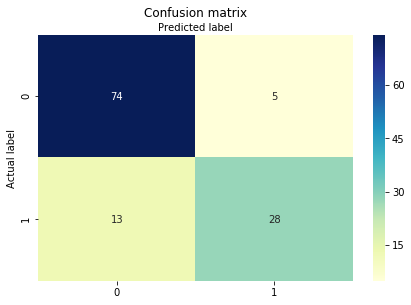

In [55]:
#confusion matrix 
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
print("Accuracy Score:",metrics.accuracy_score(y_test,y_pred))     # accuracy of model(no.of 0-0 and 1-1)
print("Precision:",metrics.precision_score(y_test, y_pred))        
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy Score: 0.85
Precision: 0.8484848484848485
Recall: 0.6829268292682927


In [57]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        79
           1       0.85      0.68      0.76        41

   micro avg       0.85      0.85      0.85       120
   macro avg       0.85      0.81      0.82       120
weighted avg       0.85      0.85      0.85       120

